Заметка\
Посмотреть про корреляцию(построение читабельной матрицы): 
https://habr.com/ru/companies/billing/articles/334738/

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Регрессионный анализ

### Этап 1. Загрузка данных - недвиимость в Бостоне

In [2]:
boston_df = pd.read_csv('data/boston.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.shape

(506, 14)

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Посмотрим основные статистичские показатели (summary statistics):

In [5]:
boston_df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Этап 2. Предварительная обработка данных

Подсчёт пропущенных значений

In [6]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Этап 3. Исследовательский анализ данных

In [7]:
# посчитаем коэффициент корреляции для всего датафрейма и округлим значение
corr_matrix = boston_df.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [8]:
def corr_matrix_analyzer(cor_coeff=0.75):
    dict_data = {}
    index = 0
    for col in corr_matrix.columns[1:]:
        data_search = corr_matrix.reset_index()
        for num, el in enumerate(data_search.loc[:index, col], 0):
            if abs(el) > cor_coeff:
                if el not in dict_data:                   
                    dict_data[el] = [data_search.loc[num, 'index'], col]
                else:
                    dict_data[el] += [data_search.loc[num, 'index'], col]
        index += 1
        
    dict_data = dict(sorted(dict_data.items()))        
    data = np.diag(np.full(len(dict_data), [*dict_data.keys()]))
    dict_index = [ind[0] for ind in dict_data.values()]
    dict_col = [ind[1] for ind in dict_data.values()]
    return pd.DataFrame(data=data, index=dict_index, columns=dict_col)

In [9]:
corr_matrix_analyzer(cor_coeff=0.69)

,DIS,DIS,MEDV,DIS,MEDV,TAX,AGE,NOX,TAX
NOX,-0.77,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
AGE,0.00,-0.75,0.00,0.00,0.0,0.00,0.00,0.00,0.00
LSTAT,0.00,0.00,-0.74,0.00,0.0,0.00,0.00,0.00,0.00
INDUS,0.00,0.00,0.00,-0.71,0.0,0.00,0.00,0.00,0.00
RM,0.00,0.00,0.00,0.00,0.7,0.00,0.00,0.00,0.00
INDUS,0.00,0.00,0.00,0.00,0.0,0.72,0.00,0.00,0.00
NOX,0.00,0.00,0.00,0.00,0.0,0.00,0.73,0.00,0.00
INDUS,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.76,0.00
RAD,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.91


Диаграммы рассеяния

In [10]:
x1 = boston_df['LSTAT']
x2 = boston_df['RM']
y = boston_df['MEDV']

Text(0.5, 1.0, 'Социальный статус населения и цены на жильё')

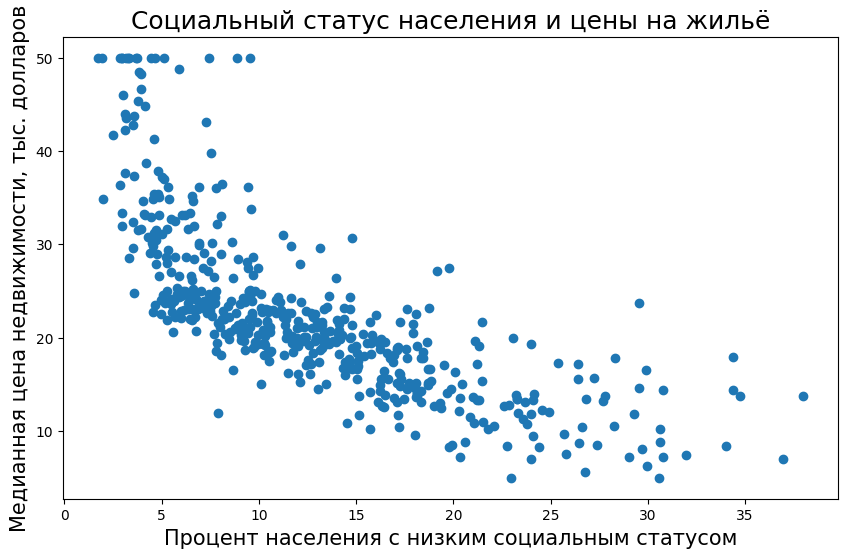

In [11]:
# зададим размер и построим первый график
plt.figure(figsize = (10,6))
plt.scatter(x1, y)

# добавим подписи
plt.xlabel('Процент населения с низким социальным статусом', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Социальный статус населения и цены на жильё', fontsize = 18)

Text(0.5, 1.0, 'Среднее количество комнат и цены на жилье')

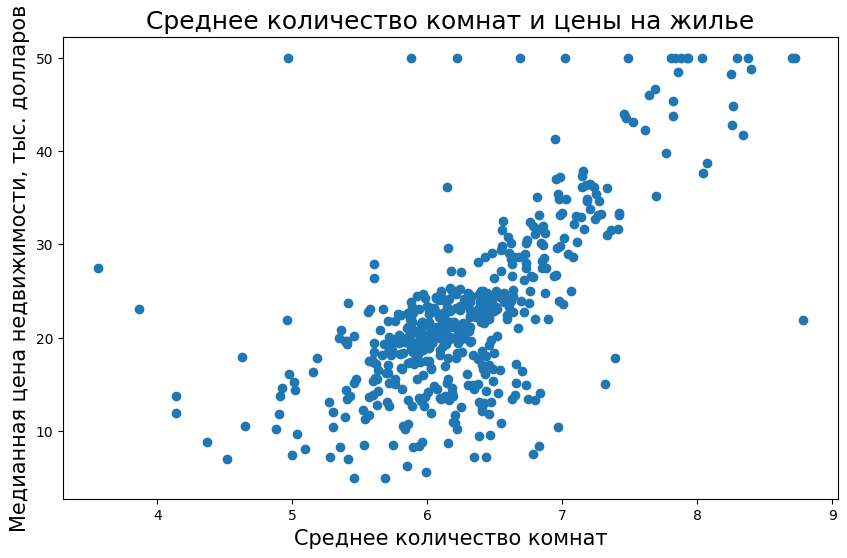

In [12]:
# зададим размер и построим второй график 
plt.figure(figsize = (10,6))
plt.scatter(x2, y)

# добавим подписи
plt.xlabel('Среднее количество комнат', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Среднее количество комнат и цены на жилье', fontsize = 18)

### Этап 4. Отбор и выделение признаков

In [13]:
X = boston_df[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']]
y = boston_df['MEDV']

На подготовку данных уходит значительная часть времени исследования

### Этап 5. Обучение и оценка качества модели

Разбивка на обучающую и тестовую выборки

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 42)

Посмотрим на размерность


In [15]:
def samples_info(*args):
    perc_cont = (lambda sample: 
                  round(sample.shape[0] / X.shape[0], 2))
    for i in range(0, len(args), 2):
        print(perc_cont(args[i]), perc_cont(args[i+1]))        

In [16]:
samples_info(X_train, X_test, y_train, y_test)

0.7 0.3
0.7 0.3


Обучим модель и сделаем прогноз

In [17]:
model = LinearRegression()

# обучим модель
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# на основе нескольких независимых переменных (X) предскажем цену на жильё (y)
y_pred = model.predict(X_test)

# выведем первые пять значений с помощью индексов
print(y_pred[:5])

[26.62981059 31.10008241 16.95701338 25.59771173 18.09307064]


Осталось оценить качество модели. Посчитаем среднеквадратичную ошибку.

In [21]:
# выведем корень среднеквадратичной ошибки
# сравним тестовые и прогнозные значения цен на жилье
print(f'Root Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Root Mean Squared Error (RMSE): 5.107447670220913


Рассчитаем новый для нас критерий качества - коэффициент детерминации $R^2$ или $R$-квадрат. $R^2$ показывает, какая доля изменчивости целевой переменной объясниется с помощью нашей модели.

In [22]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.65


В данном случае мы видим, что 65% изменчивости цены объясняется независимыми переменными, которые мы выбрали для нашей модели.

## Рекомендательная система

**Рекомендательная система** (recommender system) стремится максимально точно предсказать предпочтения потребителя и предложить наиболее подходящий товар или услугу.

### Типы рекомендательных систем

1. **Коллаборативная фильтрация (collaborative filtering).** Рекомендации основаны на истории оценок как самого пользователя, так и других.
2. **Основанные на контенте (content-based)**. Товары и услуги рекомендуются на основании знаний о них: жанр, производитель, конкретные функции и т.п.
3. **Основанные на знаниях (knoweldge-based)**. Этот тип работает на основе знаний о какой-то предметной области: о пользователях, товарах и других.
4. **Гибридные (hybrid)**. Комбинирование нескольких алгоритмов в рамках одной платформы позволяет если не устранить их полностью, то хотя бы минимизировать.

Для простоты выделим три типа рекомендательных систем: фильтрация по популярности, на основе содержания и коллаборативная система.

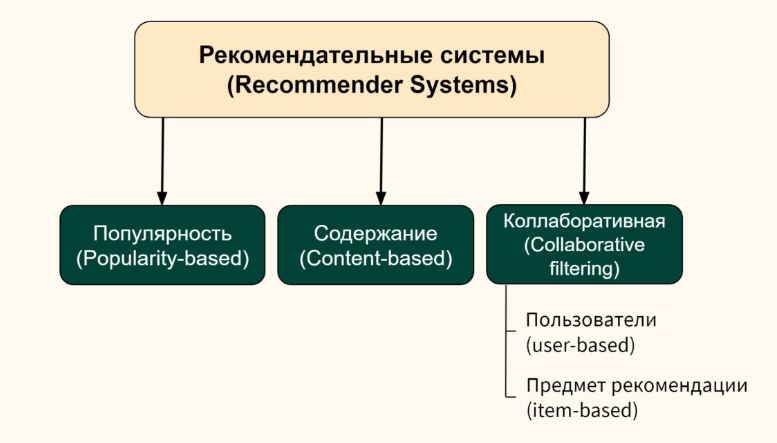

* Наиболее простая система выдаёт **рекомендации на основе популярности**(popularity-based recommender systems). Чем выше средний рейтинг фильма, купленного товара или статьи, тем вероятнее, что система будет рекомендовать именно их.

Преимуществом является простота, недостатком то, что не учитываются предпочтения конкретного пользователя.

* Вторым типом рекомендательных систем является, так называемая, **фильтрация на основе содержания** (content-based filtering). В данном случае алгоритм рекомендует товары или услуги, схожие с теми, которые пользователь приобретал ранее. Например, если вы посмотрели фильм "Матрица" с Киану Ривзом, то в дальнейшем система будет рекомендовать вам научную фантастику, а также другие фильмы с участием этого актёра.

Такую систему также несложно реализовать, при этом основным недостатком будет то, что покупатели не пробуют новые товары или услуги.

* Третий тип - коллаборативная система(collaborative filtering). Именно ей мы и будем сегодня заниматься. Она основывается на сопоставлении пользователей и товаров (или услуг, новостей и т.д.). Математически и графически в данном случае мы работаем с *матрицами предпочтений*(user-item matrix).

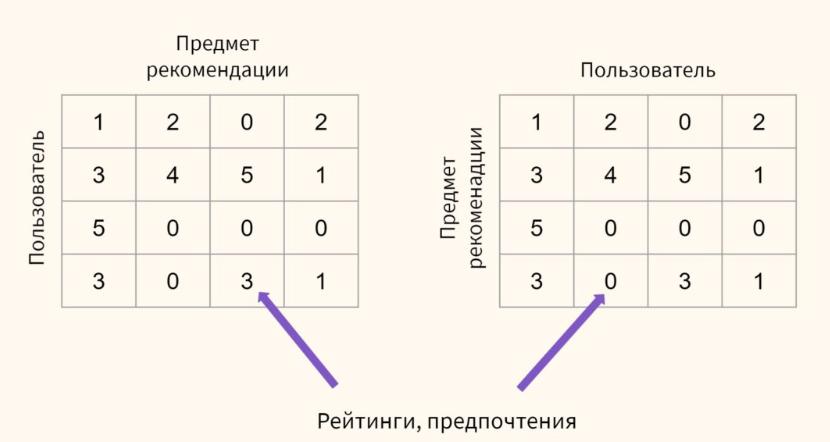

Существует два вида таких систем.
* Коллаборативные системы, основанные **на пользователях** (user-based), находят близких по предпочтениям пользователей и рекомендуют одному из них то, что уже попробовал другой.

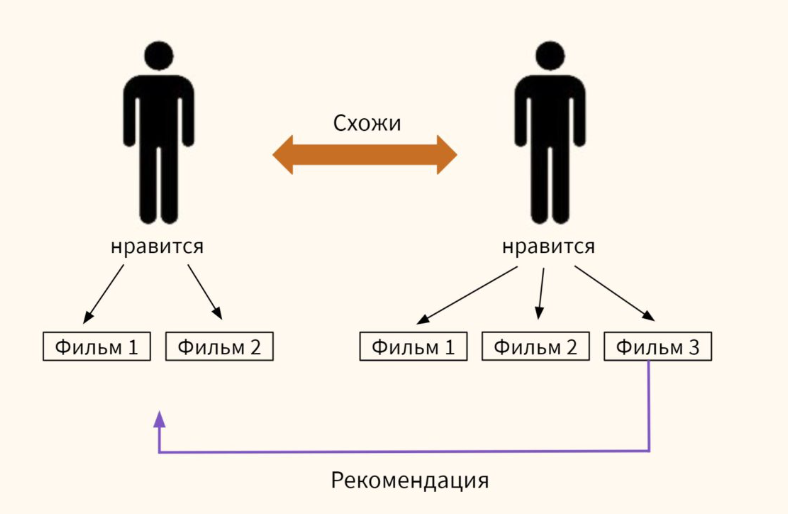
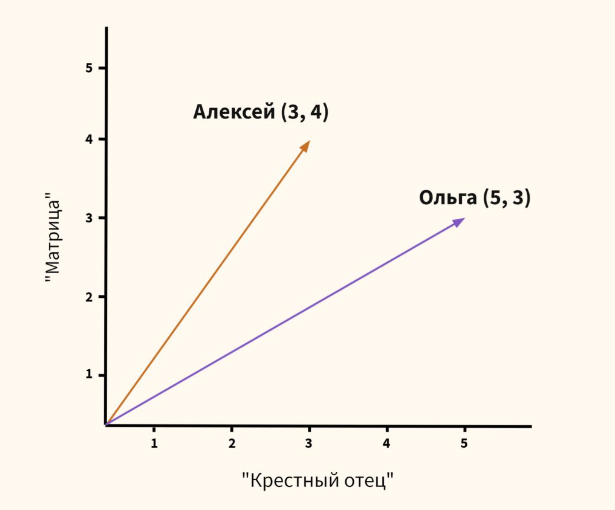

* Системы, основанные на предмете рекомендаций(item-based), сравнивают непосредственно близость товаров и услуг. Причем что отличает эту систему, сходсто определяется на основе предпочтений всех пользователей, которые оставили свои оценки.

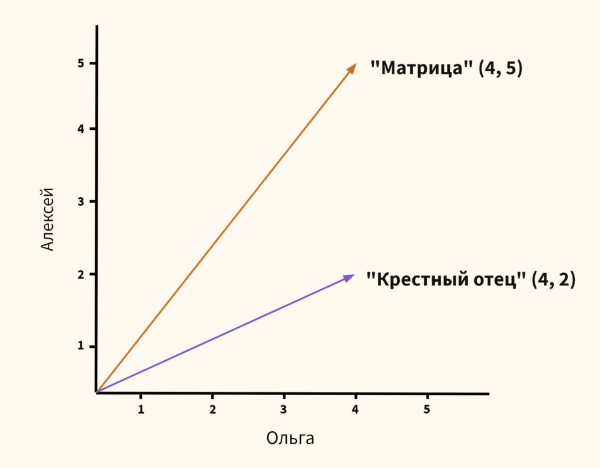

Мы будем использовать косинусовое сходство для оценки расстояния.

### Рекомендательная система для онлайн-кинотеатра

### 1. Загрузка данных и ознакомление

In [1]:
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix

from sklearn.neighbors import NearestNeighbors

In [3]:
try:
    movies = pd.read_csv('data/movies.csv')
    rating = pd.read_csv('data/ratings.csv')
except Exception as _:
    print(f'Возникла ошибка: \n{_}')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.drop(['genres'], axis = 1, inplace = True)
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
rating.drop(['timestamp'], axis = 1, inplace = True)
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
